# Interstate Traffic Project: Exploring factors that influence traffic volume

### About

This project is about exploring and analyzing interstate traffic data. Specifically the dataset covers hourly Minneapolis-St Paul, MN traffic volume for westbound I-94. The data set includes weather and holiday features from 2012-2018. The purpose of the project is to analyze traffic data to find insights on what variables impact traffic volume and other data, and to make suggestions on when the best and worst times to travel are. 

The original dataset can be found here: https://archive.ics.uci.edu/ml/datasets/Metro+Interstate+Traffic+Volume

### Goals

The central question this analysis seeks to answer is: 
- What is the primary factor that influences heavy traffic volume? 
- When is the best time to travel to avoid heavy traffic volume?


### Format Notes

This project will follow the following format: 
1. Part #
2. Step #
3. code block
4. markdown cell explainging the code and output in the block above


### Contents:
- Part 1: import and review data
- Part 2: clean the data
- Part 3: explore data
- Part 4: data analysis
- Part 5: conclusion

## Part 1: import and review data

### Step 1: import libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
pd.options.mode.chained_assignment = None
import seaborn as sns

### Step 2: read and view data set

In [2]:
traffic = pd.read_csv('Metro_Interstate_Traffic_Volume.csv')
traffic.sample(10)

,holiday,temp,rain_1h,snow_1h,clouds_all,weather_main,weather_description,date_time,traffic_volume
32412,None,278.820,0.0,0.0,1,Clear,sky is clear,2017-04-06 00:00:00,746
23719,None,288.620,0.0,0.0,90,Mist,mist,2016-05-28 07:00:00,1994
26694,None,292.160,0.0,0.0,1,Clear,sky is clear,2016-09-17 19:00:00,3592
15980,None,293.514,0.0,0.0,12,Clouds,few clouds,2015-06-22 00:00:00,742
47547,None,286.820,0.0,0.0,1,Clear,sky is clear,2018-09-09 02:00:00,620
2505,None,262.890,0.0,0.0,20,Mist,mist,2012-12-29 23:00:00,2419
26516,None,286.790,0.0,0.0,1,Clear,sky is clear,2016-09-10 22:00:00,3013
42973,None,269.650,0.0,0.0,1,Snow,light snow,2018-04-06 02:00:00,312
29545,None,268.440,0.0,0.0,20,Clouds,few clouds,2016-12-27 15:00:00,5147
13070,None,272.830,0.0,0.0,75,Clouds,broken clouds,2014-03-21 02:00:00,300


In [3]:
traffic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48204 entries, 0 to 48203
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   holiday              48204 non-null  object 
 1   temp                 48204 non-null  float64
 2   rain_1h              48204 non-null  float64
 3   snow_1h              48204 non-null  float64
 4   clouds_all           48204 non-null  int64  
 5   weather_main         48204 non-null  object 
 6   weather_description  48204 non-null  object 
 7   date_time            48204 non-null  object 
 8   traffic_volume       48204 non-null  int64  
dtypes: float64(3), int64(2), object(4)
memory usage: 3.3+ MB


The column label meanings are as follows:
- holiday: Categorical US National holidays plus regional holiday, Minnesota State Fair
- temp: Numeric Average temp in kelvin
- rain_1h: Numeric Amount in mm of rain that occurred in the hour
- snow_1h: Numeric Amount in mm of snow that occurred in the hour
- clouds_all: Numeric Percentage of cloud cover
- weather_main: Categorical Short textual description of the current weather
- weather_description: Categorical Longer textual description of the current weather
- date_time: DateTime Hour of the data collected in local CST time
- traffic_volume: Numeric Hourly I-94 ATR 301 reported westbound traffic volume

Data cleaning steps:
1. change the 'temp' column to Farenheight
2. change the 'date_time' column to dtype: datetime64
3. look for outliers and remove them

## Part 2: clean the data

### Step 1: change Kelvin to farenheight

In [4]:
#change kelvin to Farenheight
temp_f = []
for t in traffic['temp']:
    new_temp = round(((t - 273.15) * 9/5 + 32), 2)
    temp_f.append(new_temp)
    
traffic['temp_f'] = temp_f
traffic.drop('temp', axis=1, inplace=True)

This code block runs a loop over the 'temp' column in the traffic data set and applies the conversion calculation and the result is appended to a new list. The new list is appended to the data set as a new column then the 'Kelvin' column is removed. This is not necessary for the analysis but since farenheight is more familiar it will help with uderstanding the temperature. 

### Step 2: change the 'weather_description' column to dtype: datetime64

In [5]:
#change 'weather_description' to date-time type
traffic['date_time'] = pd.to_datetime(traffic['date_time'], yearfirst=True)

Above, the code converts the 'date_time' column from object to datetime64

In [6]:
#search for null, missing data, and dtypes
traffic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48204 entries, 0 to 48203
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   holiday              48204 non-null  object        
 1   rain_1h              48204 non-null  float64       
 2   snow_1h              48204 non-null  float64       
 3   clouds_all           48204 non-null  int64         
 4   weather_main         48204 non-null  object        
 5   weather_description  48204 non-null  object        
 6   date_time            48204 non-null  datetime64[ns]
 7   traffic_volume       48204 non-null  int64         
 8   temp_f               48204 non-null  float64       
dtypes: datetime64[ns](1), float64(3), int64(2), object(3)
memory usage: 3.3+ MB


### Step 3: check all numerical columns for outliers

In [7]:
traffic.describe()

,rain_1h,snow_1h,clouds_all,traffic_volume,temp_f
count,48204.000000,48204.000000,48204.000000,48204.000000,48204.000000
mean,0.334264,0.000222,49.362231,3259.818355,46.500571
std,44.789133,0.008168,39.015750,1986.860670,24.008847
min,0.000000,0.000000,0.000000,0.000000,-459.670000
25%,0.000000,0.000000,1.000000,1193.000000,30.220000
50%,0.000000,0.000000,64.000000,3380.000000,48.740000
75%,0.000000,0.000000,90.000000,4933.000000,65.580000
max,9831.300000,0.510000,100.000000,7280.000000,98.460000


In the result above we can see that there are values in 'rain_1h' and 'temp_f' have values that seem far outside the normal distribution. 

### Step 3A: remove incorrect data

In [8]:
#remove temperatures that are less than -100 degrees
too_cold = traffic['temp_f'] > -100
cold_traffic = traffic[too_cold]

#remove rain data that is incorrect
too_rainy = cold_traffic['rain_1h'] < 60 
clean_traffic = cold_traffic[too_rainy]

#check the final data set compared to that in Step 3:
clean_traffic.describe()

,rain_1h,snow_1h,clouds_all,traffic_volume,temp_f
count,48193.000000,48193.000000,48193.000000,48193.000000,48193.000000
mean,0.130342,0.000222,49.371942,3260.174029,46.604820
std,1.003480,0.008169,39.013548,1986.754010,22.876886
min,0.000000,0.000000,0.000000,0.000000,-21.570000
25%,0.000000,0.000000,1.000000,1194.000000,30.250000
50%,0.000000,0.000000,64.000000,3380.000000,48.760000
75%,0.000000,0.000000,90.000000,4933.000000,65.590000
max,55.630000,0.510000,100.000000,7280.000000,98.460000


The data set is now cleaned and ready for exploration. 

The final dataset is called 'clean_traffic'

## Part 3: exploration and analysis

Exploration plan: 
1. Look at the distribution of traffic_volume
2. Observe the average traffic_volume per hour
3. Look at traffic volume during daytime vs nighttime hours
4. Examine traffic volume by month, and by day of week
5. Determine if weather has any correlation to traffic volume


### Step 1: traffic volume distribution

count    48193.000000
mean      3260.174029
std       1986.754010
min          0.000000
25%       1194.000000
50%       3380.000000
75%       4933.000000
max       7280.000000
Name: traffic_volume, dtype: float64

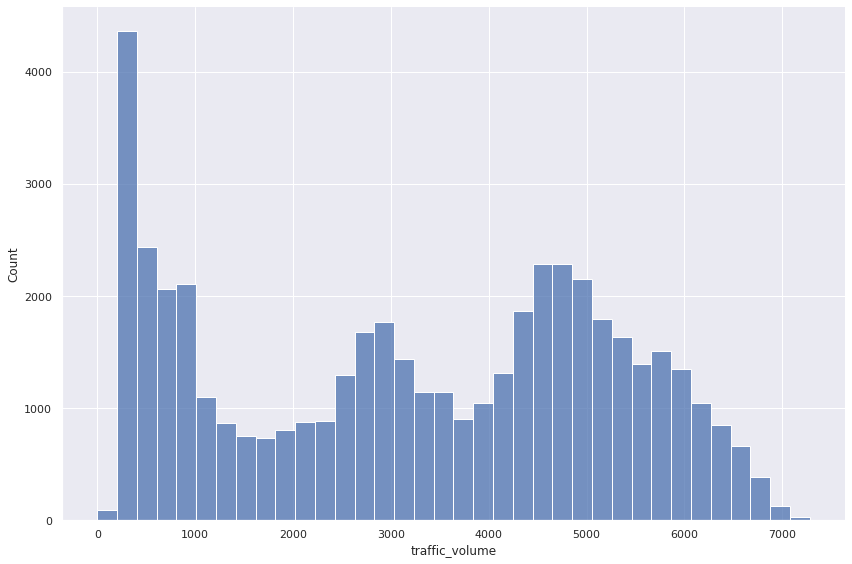

In [9]:
#add matploylib inline magic:
%matplotlib inline
from matplotlib import rcParams

#plot traffic_volume
sns.set_theme()
sns.displot(data=clean_traffic, x='traffic_volume', height=8, aspect=1.5)

clean_traffic['traffic_volume'].describe()

The chart above shows that the most traffiv volume is between 4500-5500 and 0-1000. 

### Step 2: explore relationship between hour and traffic volume

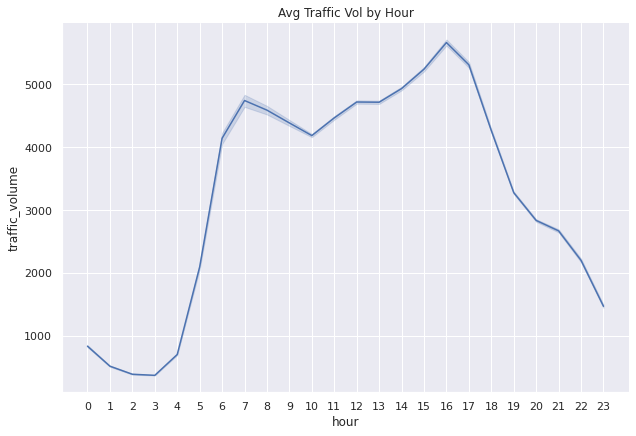

In [10]:
#create an hour column in the dataframe and use that for analysis:
clean_traffic['hour'] = clean_traffic['date_time'].dt.hour

sns.relplot(data=clean_traffic, x='hour', y='traffic_volume', kind='line', height=6, aspect=1.5)
plt.xticks(range(0, 24))
plt.title('Avg Traffic Vol by Hour')
plt.show()

We can see in the plot above that traffic volume starts off low from midnight to 0400. We then see an exponential incease in traffic volume from 0500 to 0700. Maybe this is morning rush hour traffic. From 0700 to 1000 traffic volume seems to dip slightly then rises from 1100 to 1600 with the peak at 1600. From 1600 to midnight traffic volume dips down significantly again. 

### Step 3: plot dat time vs. night time traffic volume

In [11]:
#create night time filter
night_late = clean_traffic['hour'] >= 19
night_early = clean_traffic['hour'] < 7
nighttime = night_late | night_early 

In [12]:
#create day time filter 
day_1 = clean_traffic['hour'] < 19 
day_2 = clean_traffic['hour'] >= 7
daytime = day_1 & day_2

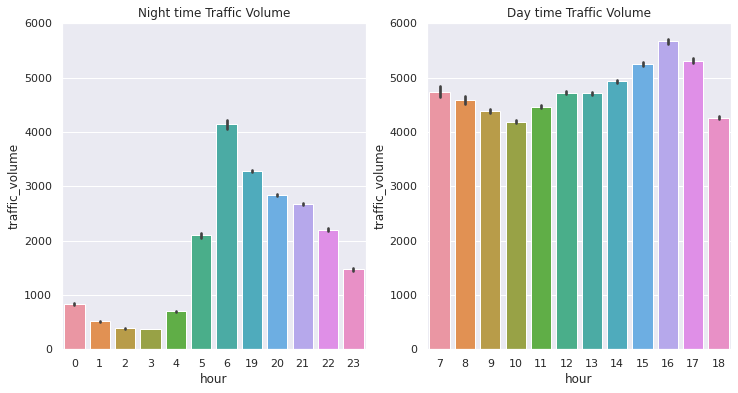

In [13]:
#plot daytime vs nighttime traffic

night_volume = clean_traffic[nighttime]
day_volume = clean_traffic[daytime]

plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
sns.barplot(data=night_volume, x='hour', y='traffic_volume')
plt.ylim(0, 6000)
plt.title('Night time Traffic Volume')

plt.subplot(1, 2, 2)
sns.barplot(data=day_volume, x='hour', y='traffic_volume')
plt.title('Day time Traffic Volume')
plt.ylim(0, 6000)
plt.show()

Here we can see that the peak traffic volume during night time hours is just above 4000, with the traffic volume during the remaining night time hours below 3000. Conpared to the day time hours, night time is significantly lower than day time. During day time hours the peak traffic volume is just under 6000. 

### Step 4: plot traffic volume by month and week day

Text(0.5, 1.0, 'Avg Daily Traffic Volume')

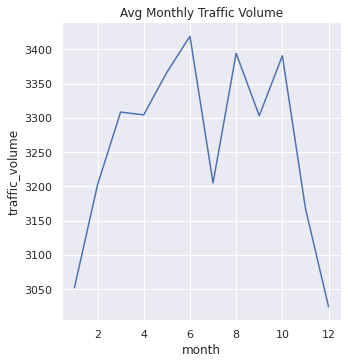

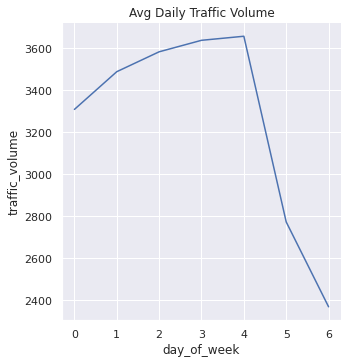

In [14]:
#create new dataframes for traffic volume by month, by day

#create a month column 
clean_traffic['month'] = clean_traffic['date_time'].dt.month
month_df = clean_traffic.groupby(['month']).mean()

#create a day of week column
clean_traffic['day_of_week'] = clean_traffic['date_time'].dt.dayofweek
dayofweek_df = clean_traffic.groupby(['day_of_week']).mean()

#plot monthly traffic vol
sns.relplot(data=month_df, x='month', y='traffic_volume', kind='line')
plt.title('Avg Monthly Traffic Volume')

#plot daily traffic vol
sns.relplot(data=dayofweek_df, x='day_of_week', y='traffic_volume', kind='line')
plt.title('Avg Daily Traffic Volume')



The line plot that is plotted first shows no real discernable pattern except that traffic volume is slightly lower in the winter months, November to February, and higher in the months from March to October. This could be due to holidays, but maybe seems counter intuitive because people tend to travel more during holiday seasons. Also this could be due to weather patterns. In Mischigan there is usually snowfall in the winter so we should explore how snow patterns affect traffic volume to see if there is any correlation. 

The traffic volume by weekday plot shows a good pattern. In the x-axis, day of the week corresponds to 0: Monday, 1: Tuesday, 2: Wednesday, 3: Thursday, 4: Friday, 5: Saturday, 6: Sunday. We can see that on Monday traffic volume gradually increases up to Friday, where it peaks and then drops off significantly from 3600 to 2400 by Sunday. In short, people travel less on the weekends. 

### Step 4: find the correlation between traffic volume and all other categories

In [15]:
#look at correlation between weather and traffic volume

correlations = clean_traffic.corr()['traffic_volume']
print(correlations)

rain_1h          -0.022382
snow_1h           0.000729
clouds_all        0.066804
traffic_volume    1.000000
temp_f            0.132256
hour              0.352277
month            -0.002819
day_of_week      -0.149299
Name: traffic_volume, dtype: float64


We can see here in the above output from the correlation method that the category that has the highest correlation to traffic_volume is 'hour'. This is consistent with the exploratory plots that were created above. The remainder of the categories have very weak correlation to traffic volume compared to hour. Even though 'hour; has the highest correlation to traffic volume, it is still a weak positive correlation at only 0.35. 

## Part 4: conclusion

The purpose of this analysis was to determine the factors that have the most influence on traffic volume on the I-94 corridor along the westbound lanes in St. Paul, Minnesota. 

We determined above that traffic volume along the west bound lanes of the I-94 corridor in St. Paul Minnesota, depends mostly on the time of day. Time of day has the highest correlation to traffic volume although it is still a relatively weak correlation. Other factors such as rain, snow, cloud coverage, temperature, day of week and month were analyzed but showed no strong correlation to traffic volume. We determined that the second most important factor on traffic volume is day of the week. In general, traffic volume is higher on working days, Monday through Friday, than on the weekends, Saturday and Sunday. 

If a traveller was reading this information and wanted to avoid heavy traffic, or if a public agency was putting out suggestions for travellers to avoid heavy traffic congestion, they should avoid travelling during the morning rush hours of 0600-0800 and 1500-1600 Monday through Friday. The best times to travel to avoid traffic congestion is during the night, 1700-0400, and during the weekends, Saturday, and Sunday. 